# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study_df = pd.merge(study_results, mouse_metadata, on=['Mouse ID'])

# Display the data table for preview
mice_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [46]:
# Checking the number of mice.
mice_total = len(mouse_metadata['Mouse ID'])

mice_total

249

In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_study_df['Mouse ID'].value_counts()

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [48]:
#Check size of mice_study_df
mice_study_df.shape

(1893, 8)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mice_study_df.set_index('Mouse ID')
duplicate_mouse_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = duplicate_mouse_df.drop(['g989'])
clean_mouse_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [51]:
# Checking the number of mice in the clean DataFrame.
new_clean_mouse_df = clean_mouse_df.reset_index()
new_clean_mouse_df['Mouse ID'].value_counts()

Mouse ID
b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: count, Length: 248, dtype: int64

In [52]:
#Checking that index was reset on new clean df
new_clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = new_clean_mouse_df.set_index('Drug Regimen').groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#drug_group.dtypes

In [54]:
#Tumor volume by Mean
per_drug_mean = drug_group["Tumor Volume (mm3)"].mean()
#Tumor volume by Median
per_drug_median = drug_group["Tumor Volume (mm3)"].median()
#Tumor volume Variance
per_drug_variance = drug_group["Tumor Volume (mm3)"].var()
#Tumor volume Standard Deviation
per_drug_stddev = drug_group["Tumor Volume (mm3)"].std()
#Tumor volume Standard Error
per_drug_stderr = drug_group["Tumor Volume (mm3)"].sem()

In [55]:
# # Assemble the resulting series into a single summary DataFrame.
drug_group_summary_df = pd.DataFrame({"Mean Tumor Volume": per_drug_mean,
                                      "Median Tumor Volume": per_drug_median,
                                      "Tumor Volume Variance": per_drug_variance,
                                      "Tumor Volume Std. Dev.": per_drug_stddev,
                                      "Tumor Volume Std. Err.": per_drug_stderr})

#Display DataFrame
drug_group_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_group_summary = new_clean_mouse_df.set_index('Drug Regimen').groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_drug_group_summary



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

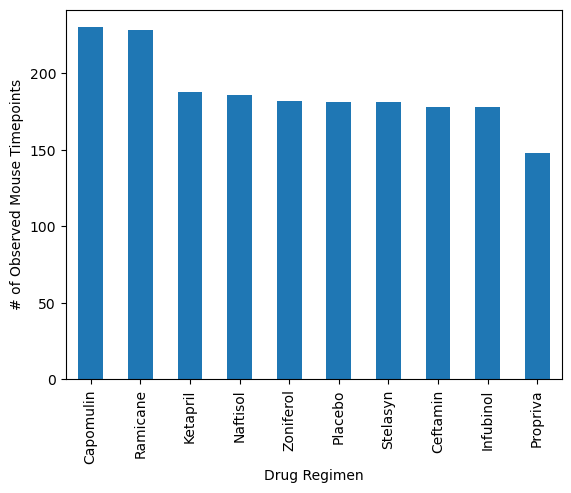

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_bar1 = new_clean_mouse_df.groupby(['Drug Regimen'])['Timepoint'].count()
drug_bar1.sort_values(ascending=False).plot.bar()

plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

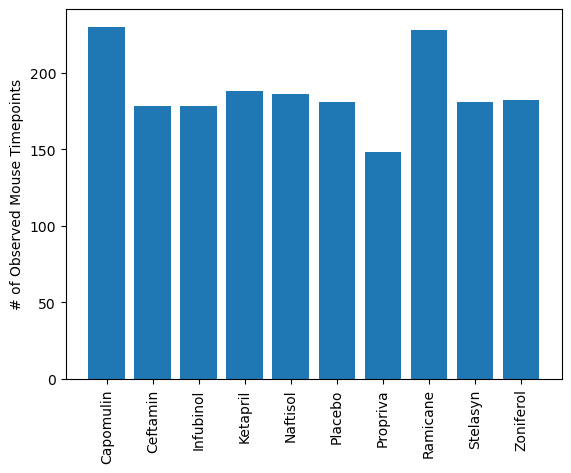

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_bar2 = drug_bar1.sort_values(ascending=False)
plt.bar(drug_bar1.index, drug_bar1.values)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.xticks()
plt.show()

<Axes: ylabel='Sex'>

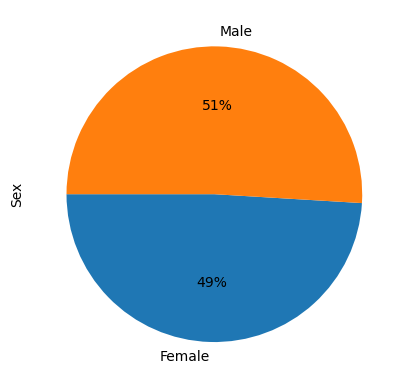

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_chart = new_clean_mouse_df.groupby(['Sex'])['Sex'].count()
sex_chart.plot(kind='pie', y='Sex', autopct='%1.0f%%', startangle=180)


In [116]:
#Checking counts of male vs female mice
sex_chart2 = new_clean_mouse_df.groupby(['Sex'])['Sex'].count()
print(sex_chart2)

Sex
Female    922
Male      958
Name: Sex, dtype: int64


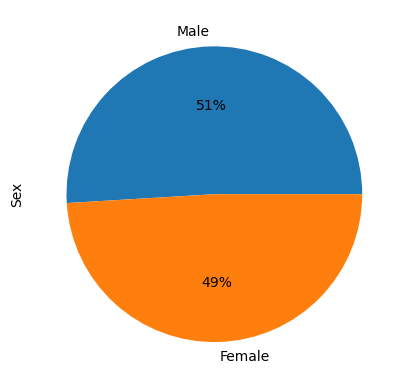

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Used the numbers from above to construct the proper pie chart
labels = ['Male', 'Female']
sex_counts = ['958', '922']
plt.pie(sex_counts, labels=labels, autopct='%1.0f%%', startangle=0)
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [62]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
